## Άσκηση 2

...


In [1]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### _Μέρος2: Σχεδιασμός και υλοποίηση φίλτρων_

Θα ασχοληθούμε με το Παράδειγμα 1.2 της παραγράφου 1.5 του τεύχους Μαθήματος. Το παράδειγμα αυτό παρουσιάζει δύο εναλλακτικές μεθόδους σχεδιασμού FIR φίλτρων:
α) τη μέθοδο των παραθύρων και
β) τη μέθοδο των ισοϋψών κυματώσεων
τις οποίες εφαρμόζει στην περίπτωση βαθυπερατών φίλτρων. 

Στο παράδειγμα, τα φίλτρα δοκιμάζονται σε ένα πραγματικό σήμα, s, το οποίο είναι αποθηκευμένο  στο αρχείο sima.mat (binary αρχείο MATLAB). Πρόκειται για ένα σήμα sonar με φάσμα που εκτείνεται μέχρι περίπου τα 4 KHz και συχνότητα δειγματοληψίας Fs=8192 (είναι και αυτή αποθηκευμένη στο αρχείο sima.mat, μαζί με το σήμα).

Εδώ θα πειραματιστούμε με δύο σήματα: (i) το sonar του παραδείγματος, το οποίο εδώ διαβάζεται από ένα .txt αρχείο (έχει προέλθει με εξαγωγή του s από το MATLAB) και (ii) ένα σήμα μουσικής, το violin.wav (σήμα από μουσική βιολιού), το οποίο περιέχει υψηλότερες συχνότητες και έχει προέλθει με δειγματοληψία στα Fs_viol=44100 Hz.


### Σήμα sonar

In [3]:
# Ανάγνωση δειγμάτων σήματος από txt file
with open('files/sima.txt') as f:
    s = [float(x) for x in f]
s=np.array(s)   
print('μέγεθος σήματος=', s.shape)
Fs=8192

μέγεθος σήματος= (6565,)


#### Στο πεδίο του χρόνου
...

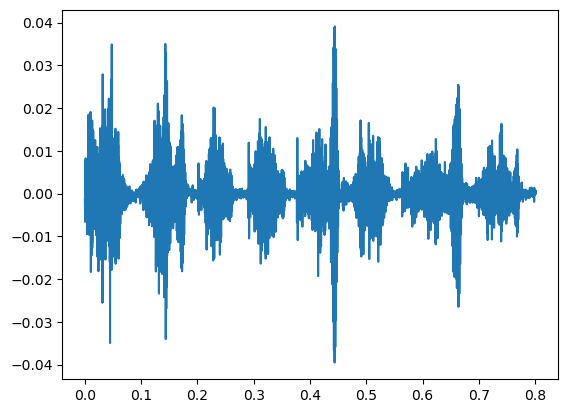

In [4]:
t=np.arange(0,len(s))/Fs
plt.plot(t,s)
plt.show()

#### Ακούμε το σήμα 

In [5]:
# Πρέπει να έχουμε εγκατεστημένη τη βιβλιοθήκη sounddevice
import sounddevice as sd
sd.play(20*s,Fs)

#### Φάσμα (spectrum) 

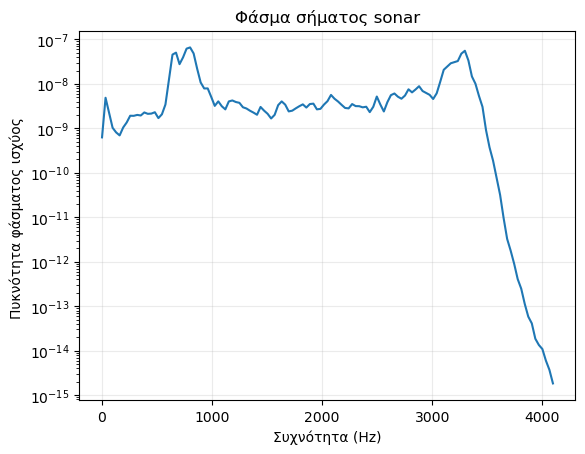

In [6]:
f, Pxx_den = signal.welch(s, Fs, noverlap=128, nperseg=256)
fig = plt.figure()
plt.title('Φάσμα σήματος sonar')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Πυκνότητα φάσματος ισχύος ')

plt.semilogy(f, Pxx_den)

### Σήμα βιολιού

In [7]:
from scipy import signal
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

In [8]:
f=open("files/violin.wav", 'rb')
Fs_viol, s_viol = scipy.io.wavfile.read(f)
print('Fs_viol=',Fs_viol, ' number of samples=',len(s_viol))
f.close()

Fs_viol= 44100  number of samples= 220500


#### Στο πεδίο του χρόνου
...

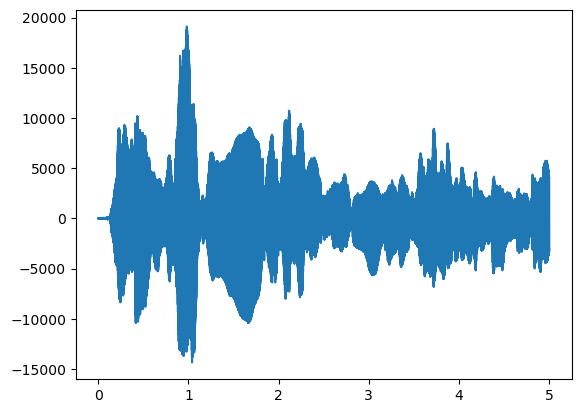

In [9]:
tvl=np.arange(0,len(s_viol))/Fs_viol
plt.plot(tvl,s_viol)
plt.show()

In [10]:
# Πρέπει να έχουμε εγκατεστημένη τη βιβλιοθήκη sounddevice
import sounddevice as sd
sd.play(s_viol,Fs_viol)

#### Φάσμα (spectrum) και Φασματόγραμμα  (spectorgram)

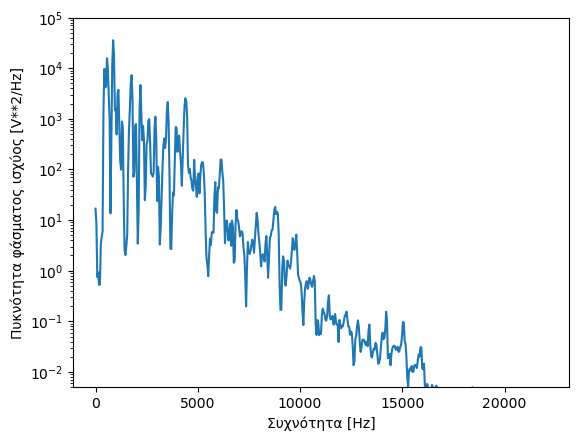

In [11]:
f, Pxx_den = signal.welch(s_viol, Fs_viol, nperseg=1024, noverlap=256)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-2, 1e5])
plt.xlabel('Συχνότητα [Hz]')
plt.ylabel('Πυκνότητα φάσματος ισχύος [V**2/Hz]')
plt.show()

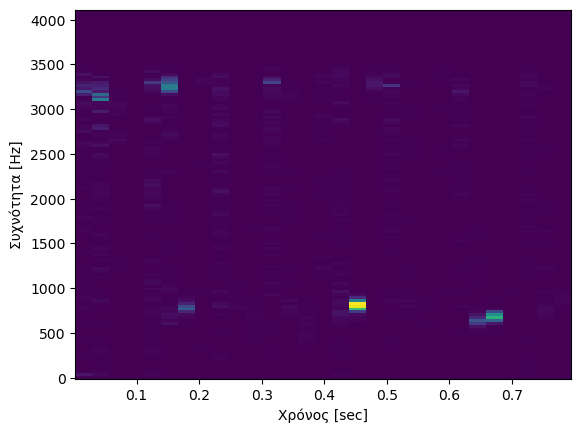

In [12]:
f, tsp, Sxx = signal.spectrogram(s, Fs)
plt.pcolormesh(tsp, f, Sxx)
plt.ylabel('Συχνότητα [Hz]')
plt.xlabel('Χρόνος [sec]')
plt.show()

### Βαθυπερατά φίλτρα

#### Η μέθοδος των παραθύρων
...
...


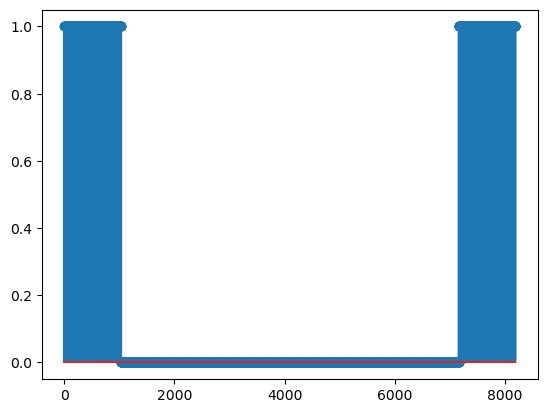

In [13]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
#
# Fs=8192
H=np.hstack((np.ones(int(Fs/8)), np.zeros(int(Fs-Fs/4)), np.ones(int(Fs/8))))
plt.stem(H)
plt.show()
# Το γράφημα αυτό αργεί... περιμένετε...

#### _Ορθογωνικό παράθυρο (απλή περικοπή της h)_

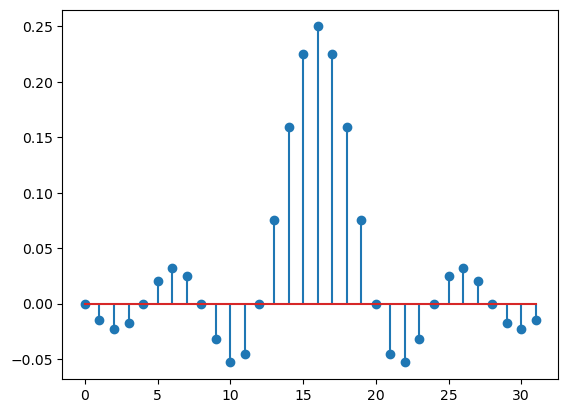

In [14]:
h=np.real(np.fft.ifft(H));
middle=int(len(h)/2)
h=np.hstack((h[middle:],h[:middle]))
h32=h[middle-16:middle+16]
h128=h[middle-64:middle+64]
plt.stem(h32)
plt.show()

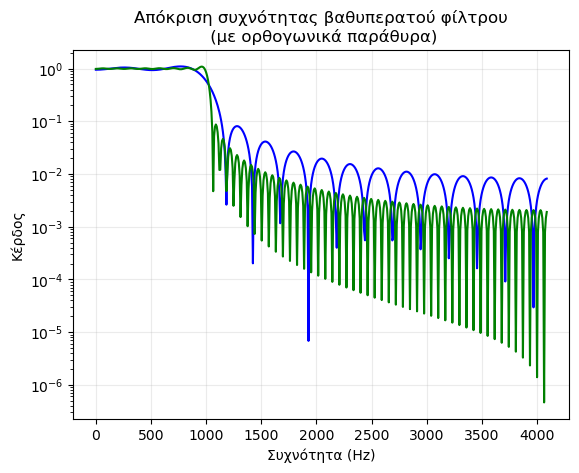

In [15]:
# Σχεδίαση απόκρισης συχνότητας (πλάτους)
#  ΜΠΟΡΕΙ ΝΑ ΓΙΝΕΙ ΣΥΝΑΡΤΗΣΗ !!!

freq,resp32 = signal.freqz(h32);

fig = plt.figure()
plt.title('Απόκριση συχνότητας βαθυπερατού φίλτρου\n (με ορθογωνικά παράθυρα)')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')

plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp32), 'b-')
freq,resp128 = signal.freqz(h128);
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp128), 'g-')

plt.show()

#### _Παράθυρα Hamming και Kaiser_

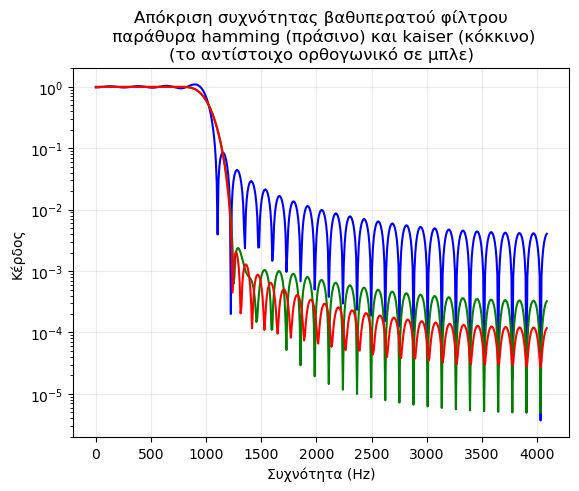

In [16]:
h64=h[middle-32:middle+32]
freq,resp64 = signal.freqz(h64);
w_hamming=signal.hamming(len(h64))
h64_hamming = np.multiply(h64,w_hamming)
w_kaiser=signal.kaiser(len(h64),5)
h64_kaiser = np.multiply(h64,w_kaiser)

fig = plt.figure()
plt.title('Απόκριση συχνότητας βαθυπερατού φίλτρου\n παράθυρα hamming (πράσινο) και kaiser (κόκκινο)\n(το αντίστοιχο ορθογωνικό σε μπλε)')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')

plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp64), 'b-')
freq,resp64_hamming = signal.freqz(h64_hamming);
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp64_hamming), 'g-')
freq,resp64_kaiser = signal.freqz(h64_kaiser);
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp64_kaiser), 'r-')

plt.show()

#### Φίλτρα ισοϋψών κυματώσεων

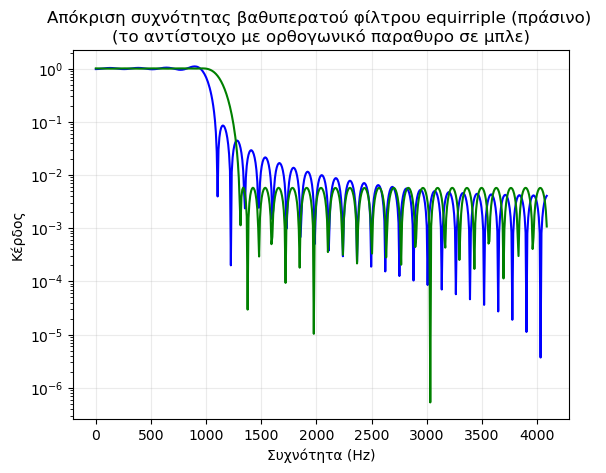

In [17]:
lpass = signal.remez(64, [0, 1000, 1300, Fs/2], [1, 0], fs=Fs)

fig = plt.figure()
plt.title('Απόκριση συχνότητας βαθυπερατού φίλτρου equirriple (πράσινο) \n(το αντίστοιχο με ορθογωνικό παραθυρο σε μπλε)')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')

plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp64), 'b-')
freq,resp_pm = signal.freqz(lpass);
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp_pm), 'g-')

plt.show()

#### Εφαρμογή του φίλτρου

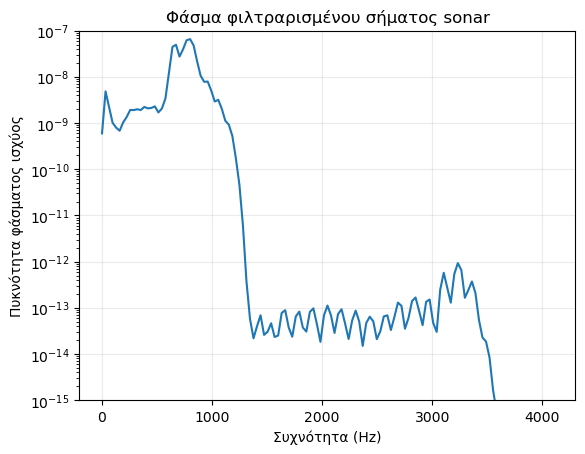

In [18]:
s_pm = signal.convolve(s,lpass,mode='same')/sum(lpass)

f, Pxx_den = signal.welch(s_pm, Fs, noverlap=128, nperseg=256)
fig = plt.figure()
plt.title('Φάσμα φιλτραρισμένου σήματος sonar')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Πυκνότητα φάσματος ισχύος')
plt.ylim((1e-15,1e-7))

plt.semilogy(f, Pxx_den)
sd.play(s_pm,Fs)



### Ζωνοπερατά φίλτρα

#### _Με αναλυτικό υπολογισμό της κρουστικής απόκρισης και παράθυρο_ 

In [19]:
# Με αναλυτικό υπολογισμό της κρουστικής απόκρισης και παράθυρο kaiser
f1=800; f2=1600;  
Ts=1/Fs;
f2m1=(f2-f1); f2p1=(f2+f1)/2; N=256;
t=np.arange(-(N-1),N-1,2)*Ts/2;
hbp=2/Fs*np.divide(np.multiply(np.cos(2*np.pi*f2p1*t),np.sin(np.pi*f2m1*t))/np.pi,t);
hbpw=np.multiply(hbp,signal.kaiser(len(hbp),5));

s_bp=signal.convolve(s,hbp,'same');

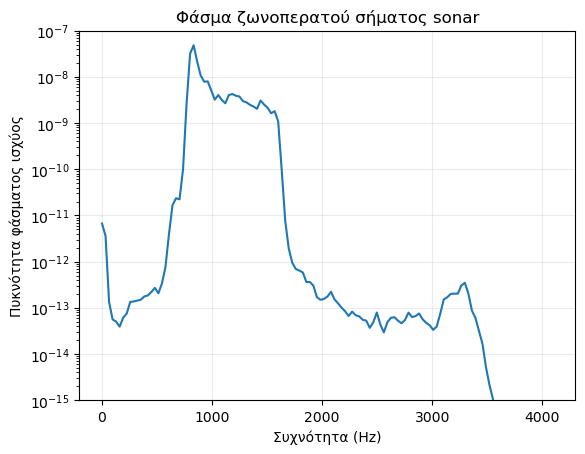

In [20]:
f, Pxx_den = signal.welch(s_bp, Fs, noverlap=128, nperseg=256)
fig = plt.figure()
plt.title('Φάσμα ζωνοπερατού σήματος sonar')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Πυκνότητα φάσματος ισχύος')
plt.ylim((1e-15,1e-7))

plt.semilogy(f, Pxx_den)
sd.play(20*s_bp,Fs)

#### _Ζωνοπερατό ισουψών κυματώσεων_ 

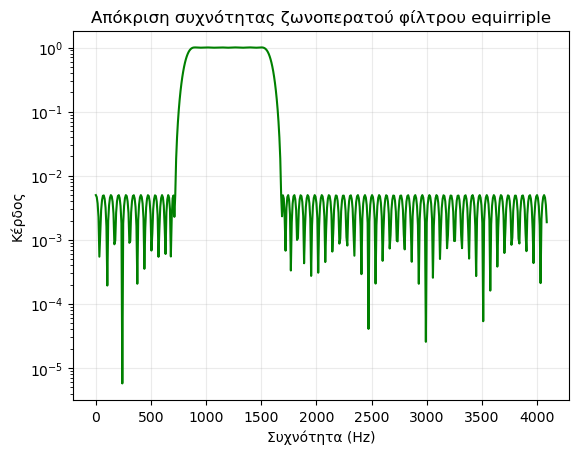

In [21]:
bpass = signal.remez(128, [0, f1*0.9, f1*1.1, f2*0.95, f2*1.05, Fs/2], [0, 1, 0], fs=Fs)

fig = plt.figure()
plt.title('Απόκριση συχνότητας ζωνοπερατού φίλτρου equirriple')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')

freq,resp_pm = signal.freqz(bpass);
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp_pm), 'g-')

plt.show()